<a href="https://colab.research.google.com/github/SzymSAS/lecture1/blob/main/Regresja_Logistyczna_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import PredictionErrorDisplay
from sklearn.datasets import load_breast_cancer
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve

In [2]:
data = load_breast_cancer()
y = data.target #list(data.target_names)
X = data.data #data.feature_names

In [22]:
X.shape

(569, 30)

In [21]:
print(data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [20]:
print(data.target_names)

['malignant' 'benign']


In [19]:
print(f"Liczba przypadków raka złośliwego: {sum(y == 0)}")

Liczba przypadków raka złośliwego: 212


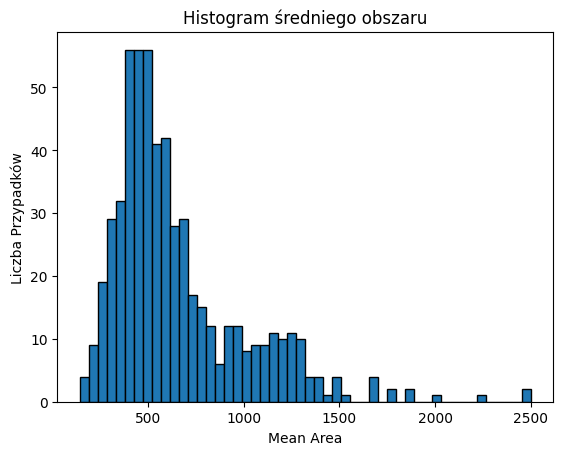

In [42]:
mean_area_index = list(data.feature_names).index("mean area")

mean_area = X[:, mean_area_index]

plt.hist(mean_area, bins=50, edgecolor='black')
plt.xlabel("Mean Area")
plt.ylabel("Liczba Przypadków")
plt.title("Histogram średniego obszaru")
plt.show()

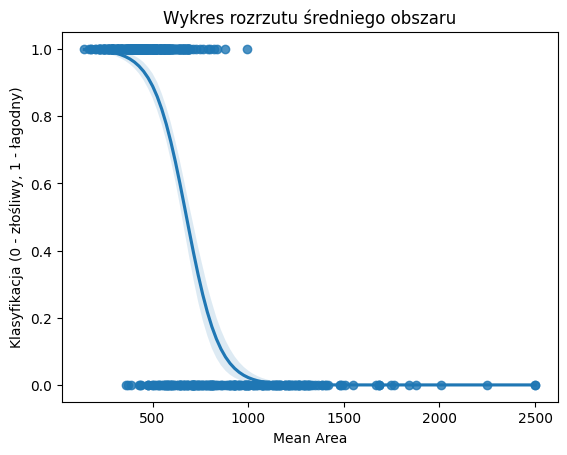

In [43]:
sns.regplot(x=mean_area, y=y, logistic=True)
plt.xlabel("Mean Area")
plt.ylabel("Klasyfikacja (0 - złośliwy, 1 - łagodny)")
plt.title("Wykres rozrzutu średniego obszaru")
plt.show()

In [51]:
print(f"Mean of first 5 features: {np.mean(X[:, :5], axis=0)}")
print(f"Std of first 5 features: {np.std(X[:, :5], axis=0)}")

Mean of first 5 features: [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02]
Std of first 5 features: [3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02]


In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verify standardization
print("\nAfter standardization:")
print(f"Mean of first 5 features: {np.mean(X_scaled[:, :5], axis=0)}")
print(f"Std of first 5 features: {np.std(X_scaled[:, :5], axis=0)}")


After standardization:
Mean of first 5 features: [-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15]
Std of first 5 features: [1. 1. 1. 1. 1.]


In [53]:
# 2. Split data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]


Text(0.5, 1.0, 'Confusion Matrix')

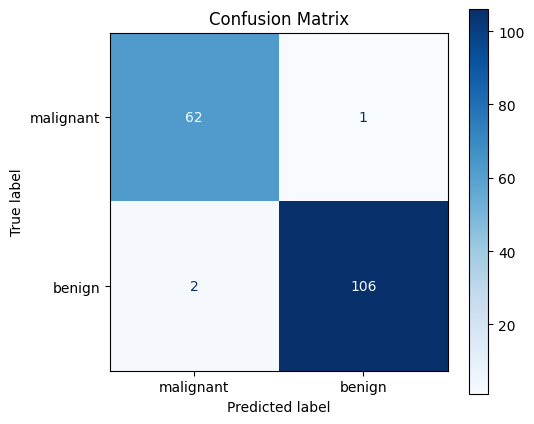

In [54]:
# 3. Visualize results
plt.figure(figsize=(12, 5))

# Confusion Matrix
plt.subplot(1, 2, 1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues', ax=plt.gca())
plt.title('Confusion Matrix')

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


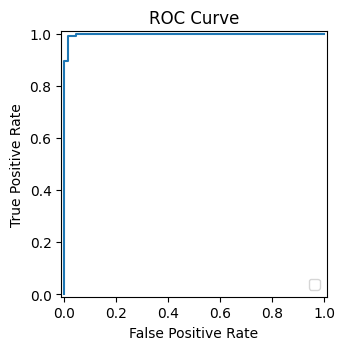

In [55]:
# ROC Curve
plt.subplot(1, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(ax=plt.gca())
plt.title('ROC Curve')

plt.tight_layout()
plt.show()

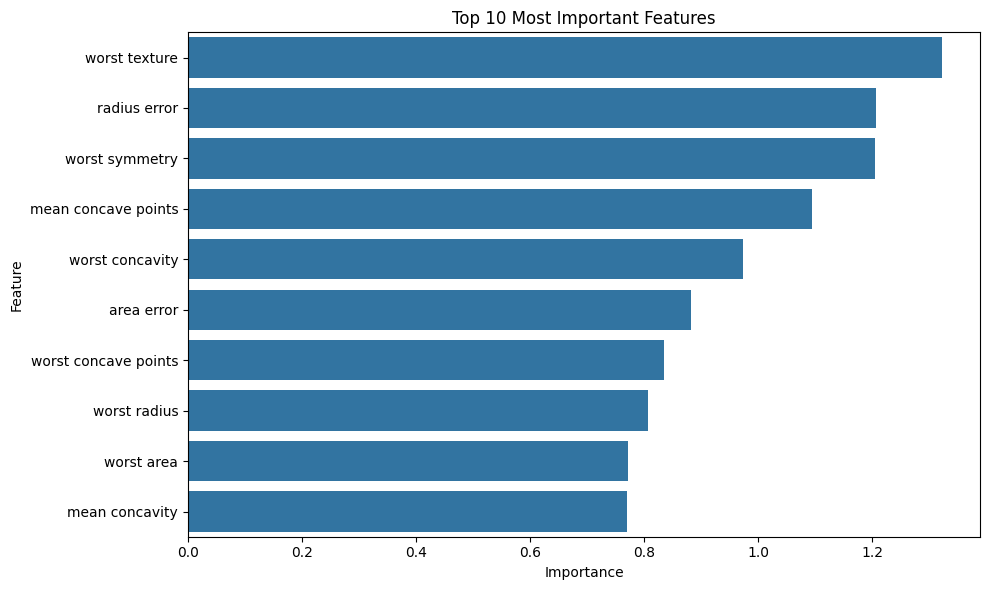

In [56]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': np.abs(model.coef_[0])
})

# Display top 10 most important features
top_features = feature_importance.sort_values('Importance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Top 10 Most Important Features')
plt.tight_layout()
plt.show()